In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# load the data
df = pd.read_csv('Data/clean/allReposCleaned.csv')

In [3]:
# delete missing values
df = df.dropna()
# check missing values
df.isnull().sum()

id                  0
name                0
owner_user          0
owner_type          0
description         0
url                 0
is_fork             0
date_created        0
date_updated        0
date_pushed         0
size                0
stars               0
watchers            0
updated_at          0
language            0
has_issues          0
has_projects        0
has_downloads       0
has_wiki            0
has_pages           0
has _discussions    0
num_forks           0
is_archived         0
is_disabled         0
is_template         0
license             0
open_issues         0
topics              0
dtype: int64

/var/folders/cv/7plhz1gs47ggc8534599rnhc0000gn/T/ipykernel_79816/1055289180.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


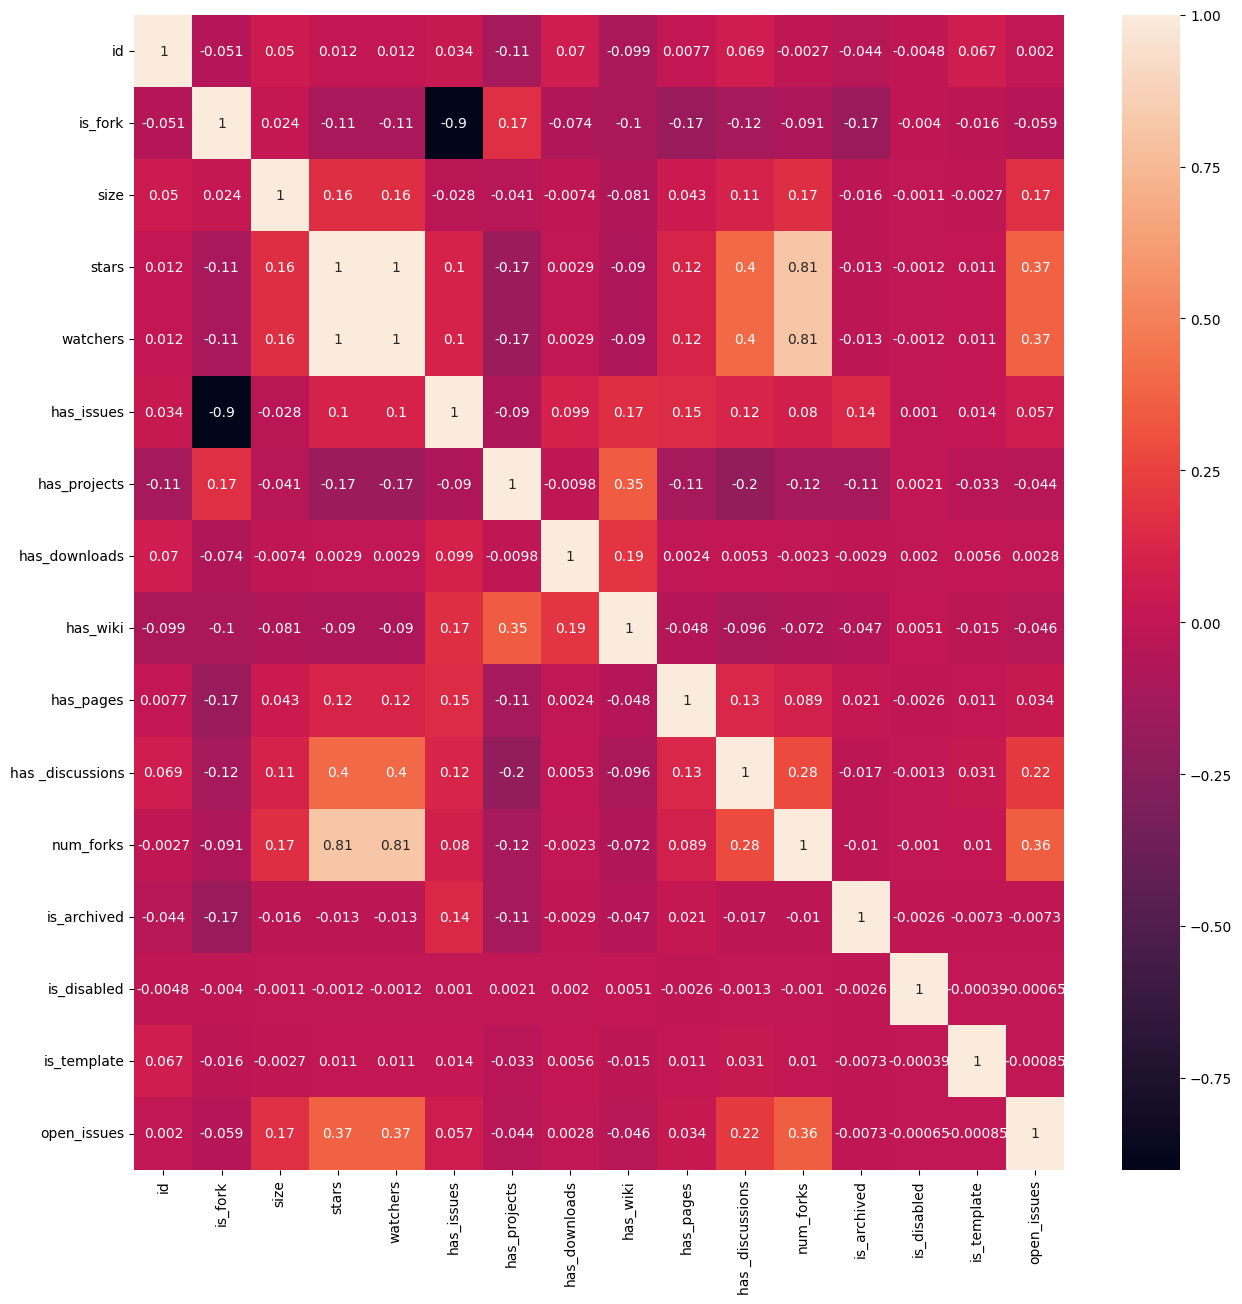

In [4]:
# create a correlation matrix to see the relationship between the variables
correlation_matrix = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [5]:
# Select relevant features
# Assuming 'stars' as a proxy for popularity/quality
features = ['size', 'watchers', 'num_forks', 'open_issues']
target = 'name'

# For this example, let's just drop rows with missing values in these columns
df_cleaned = df.dropna(subset=features + [target])

# We will not convert 'language' to numerical format here as we'll filter by language when making recommendations

df_cleaned[features + [target]].head()

,size,watchers,num_forks,open_issues,name
0,84,1,0,0,beforerender
1,131,1,1,0,bliptv
2,180,19,6,0,bn4r
3,874,1,0,0,cachemoney
4,106,1,1,0,contacts


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 5: Train-Test Split
X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Training the Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

mse, r2

ValueError: could not convert string to float: 'findo'

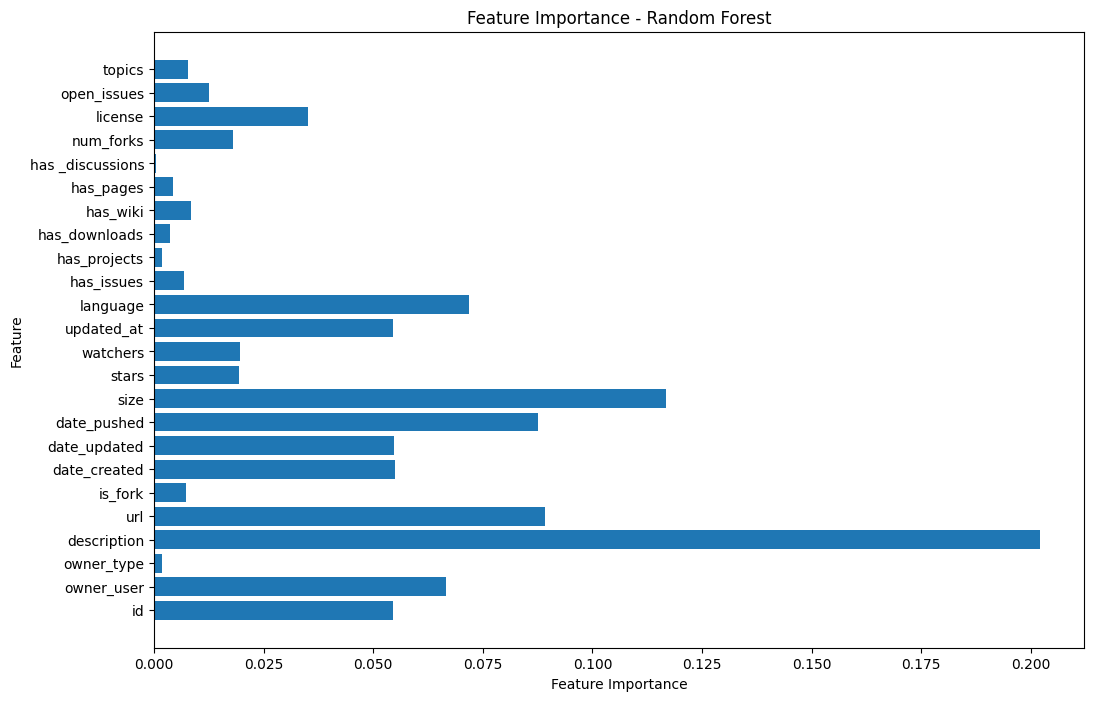

In [ ]:
# carry out feature importance for the dataset using random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Preprocessing
# Selecting numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encoding categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Define target variable
target = 'name'

# Separating features and target
X = df.drop(target, axis=1)
y = df[target]

# Random Forest for feature importance
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

# Getting feature importance
feature_importance = rf.feature_importances_
total_importance = sum(feature_importance)

# Creating a bar chart for feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()